# Linear Regression with Mini-batch

In [1]:
import numpy as np

x = np.array([1, 2, 3]) ## vector
print(x)
print(np.diag(x)) ## vector 값으로 diagonal matrix를 만든다.

[1 2 3]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [3]:
M = np.random.normal(0, 1, (2, 3))
N = np.random.normal(0, 1, (3, 4))
print(np.matmul(M, N).round(3)) ## Matrix multiplication
print((M @ N).round(3)) ## @ 기호를 통해서도 가능하다.

[[ 2.815  0.088 -0.876  0.453]
 [-0.28   1.26  -0.084 -0.025]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(0)
plt.style.use("seaborn")

## Set Params
N, n_feature = 300, 5
lr = 0.03
epochs = 30
batch_size = 32
n_batch = N // batch_size ## 62

target_weight = np.random.uniform(-1, 1, (n_feature, 1))
target_bias = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))
# print(target_weight.shape, W.shape)
# print(target_bias.shape, b.shape)

## generate dataset
x_data = np.random.randn(N, n_feature)
# print(x_data.shape)
y_data = x_data @ target_weight + target_bias
# print(y_data.shape)

J_track, W_track, b_track = [], [], []
for epoch in range(epochs):
    for b_idx in range(n_batch):
        W_track.append(W)
        b_track.append(b)

        ## Get mini-batch
        X = x_data[b_idx * batch_size : (b_idx + 1) * batch_size, ...] ## 0 ~ 31, 32 ~ 64 ...
        Y = y_data[b_idx * batch_size : (b_idx + 1) * batch_size, ...]
        # print(X.shape, Y.shape)

        ## Forward propagation
        pred = X @ W + b
        J0 = (Y - pred)**2
        J = np.mean(J0)
        J_track.append(J)
        
        ## Jacobians
        dJ_dJ0 = 1 / batch_size * np.ones((1, batch_size))
        dJ0_dpred = np.diag(-2 * (Y - pred).flatten())
        dpred_dW = X
        dpred_dB = np.ones((batch_size, 1))

        ## Backpropagation
        dJ_dpred = dJ_dJ0 @ dJ0_dpred
        dJ_dW = dJ_dpred @ dpred_dW
        dJ_db = dJ_dpred @ dpred_dB

        ## Parameter Update
        W = W - lr * dJ_dW.T
        b = b - lr * dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)

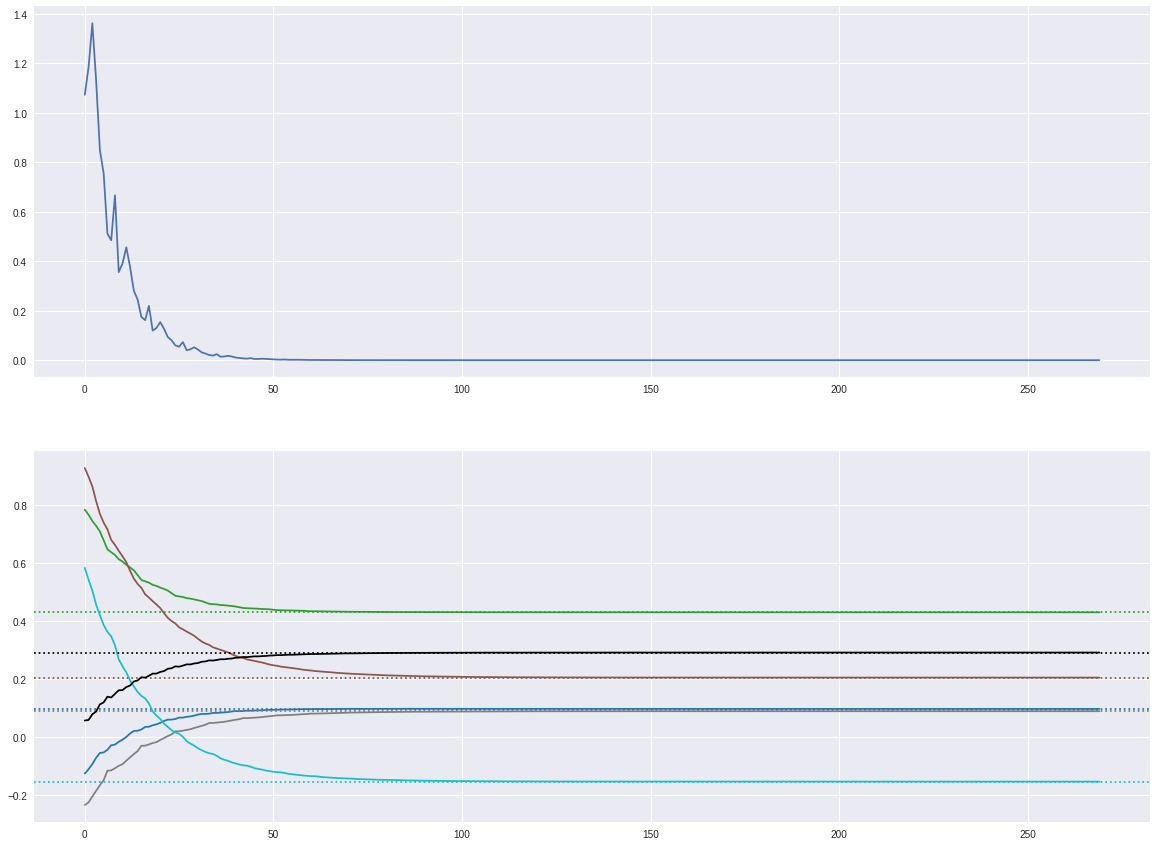

In [13]:
cmap = cm.get_cmap("tab10", n_feature)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(J_track)

for w_idx, (w_target, w_track) in enumerate(zip(target_weight, W_track)):
    axes[1].axhline(y = w_target, linestyle=':', color=cmap(w_idx))
    axes[1].plot(w_track, color=cmap(w_idx))

axes[1].axhline(y=target_bias, linestyle=":", color="black")
axes[1].plot(b_track, color="black")